# 5 Signs You've Become an Advanced Pandas User Without Even Realizing It
## Time to take credit
![](images/pixabay.jpg)

<figcaption style="text-align: center;">
    Image by <a href="https://pixabay.com/users/barbaraalane-756613/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=2144354">Barbara A Lane</a> from <a href="https://pixabay.com//?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=2144354">Pixabay</a>
</figcaption>

### Introduction

Do you find yourself daydreaming about DataFrames and Series? Do you spend hours on end performing complex manipulations and aggregations, barely noticing your back pain and thinking "this is so much fun" all the while?

Well, my friend, you might as well be an advanced Pandas user without even realizing it. Join the club of Pandas aficionados who have reached this rare level and embrace the fact that you are officially a data wizard.

So, let's take a look at five signs that you are in this club. 

### 0. Know when to ditch Pandas

When you first started out learning data analysis, it might have seemed like Pandas could do everything. Many online courses marketed Pandas as a one-stop-shop for all your data-related needs. However, with experience, you've come to realize that Pandas has many shortcomings. Instead of blindly busting Pandas for any data-related task, you know how to take a step back and ask yourself, "Is Pandas the best option here?"

There are a few scenarios where the answer to that question is a big fat NO. These include real-time data processing, handling massive datasets, high-performance computing, and production-level data pipelines. 

For real-time data processing, imagine a cannon that shoots pieces of real-time data from some process at 100 sph (shoots per hour :). The pieces are coming fast and furious, and you have to catch, process, and save each one mid-air. Put gently, Pandas will be suffocated by this level of data processing. Instead, you should use libraries like Apache Kafka.

When it comes to massive datasets, Wes McKinney, the creator of Pandas, had a rule of thumb: 

> the RAM must be 5-10 times bigger than the dataset size for Pandas to work optimally. 

"Easy enough", you would say if it was 2013, but today's datasets tend to break this rule easily.

High-performance computing is like conducting a symphony. Just as a conductor needs to coordinate the action of many different musicians to create a harmonious performance, high-performance computing tasks require coordination and synchronization of multiple processing elements to achieve the best results. 

However, Pandas runs solo and cannot handle such tasks.

For production-level data pipelines, think of data pipelines as a water supply system. Just as a water supply system needs to be reliable, scalable, and maintainable to ensure a constant supply of clean water, data pipelines need similar qualities. While Pandas may take care of cleaning and transformation, other libraries should be used for the rest. 

It may be difficult to leave the furry arms of Pandas, but don't feel guilty about exploring other options if it isn't enough. 

Personally, I have recently become interested in Polars, a library written in Rust that was designed from scratch to address all the limitations of Pandas.

https://towardsdatascience.com/7-easy-steps-to-switch-from-pandas-to-lightning-fast-polars-and-never-return-b14c66fc85b9

You can also play mix-and-match with libraries like `datatable`. Here is a code snippet I often use to load large CSVs in a fraction of a second and perform my analyses in Pandas:

```python
import datatable as dt

df = dt.fread("my_large_file.csv").to_pandas()
```

### 1. Need For Speed

Pandas is a massive library with many different methods to perform the same task. However, if you're an experienced user, you know which method works best in specific situations. 

For instance, you're familiar with the differences between iteration functions like `apply`, `applymap`, `map`, `iterrows`, and `itertuples`. You are also aware of the trade-offs between using a slower alternative for better functionality and using the best one for optimal speed.

While some people may call you fussy, you carefully use `iloc` and `loc` because you know that `iloc` is faster for indexing rows, and `loc` is faster for columns. However, when it comes to indexing values, you avoid these accessors because you understand that conditional indexing is orders of magnitude faster with the [`query`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html) function.


```python
# DataFrame of stock prices
stocks_df = pd.DataFrame(
    columns=['date', 'company', 'price', 'volume']
)

threshold = 1e5

# Rows where the average volume for a company 
# is greater than some threshold
result = df.query(
    '(volume.groupby(company).transform("mean") > @threshold)'
)
```

And you also know that the `replace` function is best friends with `query` to replace values. 

```python
df.query('category == "electronics"').replace(
    {"category": {"electronics": "electronics_new"}}, inplace=True
)
```


Besides, you are comfortable with different file formats and consciously choose between various file formats such as CSVs, Parquets, Feathers, and HDFs, instead of blindly pouring everything into good-old CSVs. You know that choosing the right format can help save hours and memory resources down the line.

In addition to file formats, you also have a powerful trick up your sleeve - vectorization! Rather than treating DataFrames as just _data frames_, you think of them as matrices and the columns as vectors. Whenever you find yourself itching to use an iteration function like `apply` or `itertuples`, you first see if you can use vectorization to apply a function to all elements in a column simultaneously, rather than one-by-one.

Moreover, you prefer to use the underlying NumPy arrays with the `.values` attribute instead of Pandas series because you have observed first-hand how vectorization is much faster with NumPy arrays.

https://towardsdatascience.com/how-to-boost-pandas-speed-and-process-10m-row-datasets-in-milliseconds-48d5468e269

When all else fails, you don't call it a day and give up. No. 

You turn to either Cython or Numba for truly computationally-intensive tasks because you are a pro. While most people learned Pandas basics, you spent a few excruciating hours to learn these two technologies. That's what sets you apart.

As if all these weren't enough, you have given the [Enhancing performance](https://pandas.pydata.org/pandas-docs/stable/user_guide/enhancingperf.html) page of Pandas user guide a thorough read.  

### 2. So many data types

Pandas offers so much flexibility with data types. Instead of just using plain `float`, `int`, and `object` data types, you have made the following two images your wallpapers:

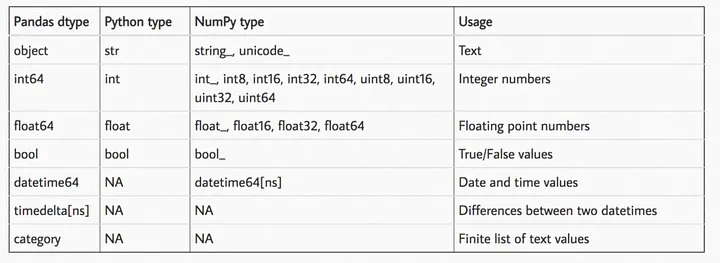
PBPython BSD-3 clause

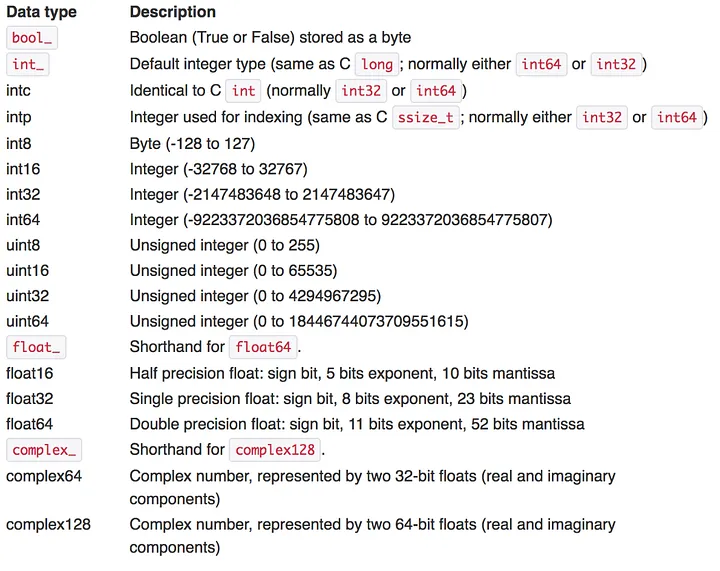
SciPy docs

You deliberately choose the smallest data type possible because you know it is very friendly for your RAM. You know that `int8` takes up much less memory than `int64`, and the same goes for floats. You also avoid the `object` data type like the plague since it is the worst one there is. 

Before reading data files, you observe their top few rows with `cat file_name.extension` to decide which data types you want to use for the columns. Then, when using `read_`* functions, you fill out the `dtype` parameter for each column instead of letting Pandas decide for itself. 

You also perform data manipulation _inplace_ as much as possible. Without it, you know that Pandas spawns off copies of the DataFrames and Series, littering your memory. Additionally, you have a very good grip of parameters and classes like `pd.Categorical` and `chunksize`.

### 3. Friends with Pandas

If there is one thing that makes Pandas the king of data analysis libraries, it's got to be its integration with the rest of the data ecosystem

For example, by now you must have realized how you can change the plotting backend of Pandas from Matplotlib to either Plotly, HVPlot, holoviews, Bokeh, or Altair. Yes, Matplotlib is best friends with Pandas but for once in a while, you fancy something interactive like Plotly or Altair

```python
import pandas as pd
import plotly.express as px

# Set the default plotting backend to Plotly
pd.options.plotting.backend = 'plotly'
```

Talking about backends, you've also noticed that Pandas added a fully-supported PyArrow implementation for its `read_*` functions to load data files in the brand-new 2.0.0 version. 

```python
import pandas as pd

pd.read_csv(file_name, engine='pyarrow')
```

When it was NumPy backend only, there were many limitations like little support for non-numeric data types, near-total disregard to missing values or no support for complex data structures (dates, timestamps, categoricals). 

Before 2.0.0, Pandas had been cooking up in-house solutions to these problems but they were not as good as some heavy users have hoped. With PyArrow backend, loading data is considerably faster and it brings a suite of data types that Apache Arrow users are familiar with

```python
import pandas as pd

pd.read_csv(file_name, engine='pyarrow', dtype_engine='pyarrow')
```

How about web scraping? Like me, you must love how the `read_html` function can retrieve tables from any HTML markup using just its link and return DataFrames. In a single line of code, Pandas uses well-known scraping libraries like `beautifulsoup4` and `lxml`:

```python
import pandas as pd

# Scrape El Clásico results from Wikipedia
df = pd.read_html("https://en.wikipedia.org/wiki/El_Cl%C3%A1sico")
```

Another cool feature of Pandas I am sure you use all the time in JupyterLab is styling DataFrames. Since project Jupyter is so awesome, Pandas developers added a bit of HTML/CSS magic so you can spice up plain old DataFrames in a way that reveals additional insights

```python
df.sample(20, axis=1).describe().T.style.bar(
    subset=["mean"], color="#205ff2"
).background_gradient(
    subset=["std"], cmap="Reds"
).background_gradient(
    subset=["50%"], cmap="coolwarm"
)
```

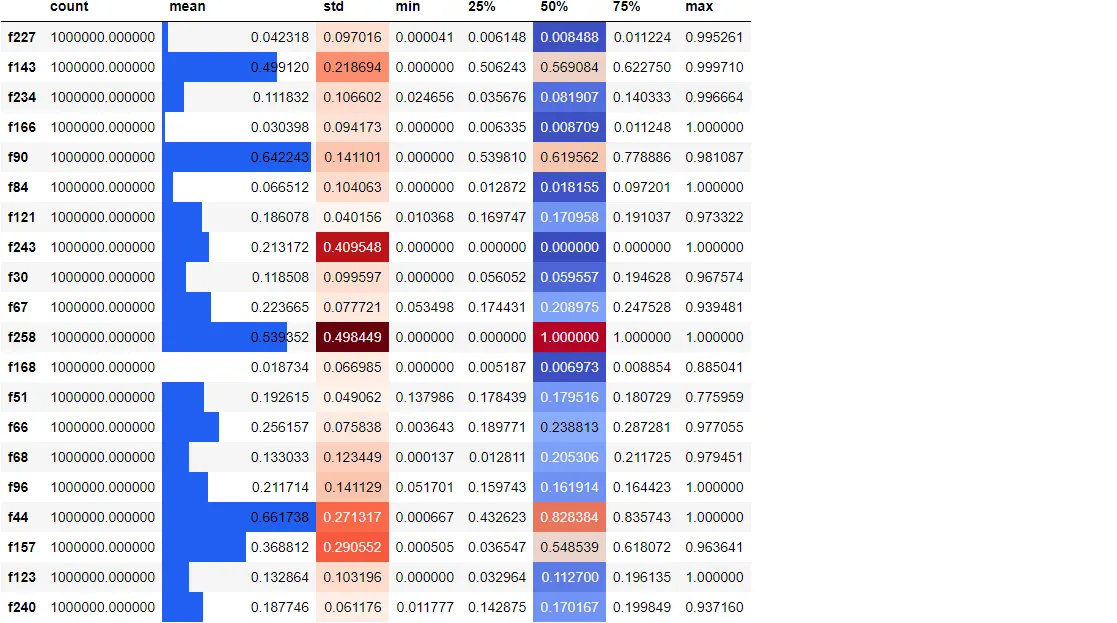


### 4. The data sculptor

Since Pandas is a data analysis and manipulation library, the truest sign you are pro is how flexibly you can shape and transform datasets to suit your purposes. 

While most online courses provide the ready-made, cleaned columnar format data, the datasets in the wild come in many shapes and forms. For example, one of the most annoying formats of data is row-based (very common with financial data):

In [5]:
import pandas as pd

# create example DataFrame
df = pd.DataFrame(
    {
        "Date": [
            "2022-01-01",
            "2022-01-02",
            "2022-01-01",
            "2022-01-02",
        ],
        "Country": ["USA", "USA", "Canada", "Canada"],
        "Value": [10, 15, 5, 8],
    }
)

df

,Date,Country,Value
0,2022-01-01,USA,10
1,2022-01-02,USA,15
2,2022-01-01,Canada,5
3,2022-01-02,Canada,8


You must be able to convert this into a more useful format like this using [`pivot`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html) function:

In [3]:
pivot_df = df.pivot(
    index="Date",
    columns="Country",
    values="Value",
)

pivot_df

Country,Canada,USA
Date,,
2022-01-01,5,10
2022-01-02,8,15


You may also have to perform the opposite of this operation, called a melt.

Here is an example with [`melt`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) function of Pandas:

In [6]:
df = pd.DataFrame(
    {
        "Date": ["2022-01-01", "2022-01-02", "2022-01-03"],
        "AAPL": [100.0, 101.0, 99.0],
        "GOOG": [200.0, 205.0, 195.0],
        "MSFT": [50.0, 52.0, 48.0],
    }
)

df

,Date,AAPL,GOOG,MSFT
0,2022-01-01,100.0,200.0,50.0
1,2022-01-02,101.0,205.0,52.0
2,2022-01-03,99.0,195.0,48.0


In [7]:
melted_df = pd.melt(
    df, id_vars=["Date"], var_name="Stock", value_name="Price"
)

melted_df

,Date,Stock,Price
0,2022-01-01,AAPL,100.0
1,2022-01-02,AAPL,101.0
2,2022-01-03,AAPL,99.0
3,2022-01-01,GOOG,200.0
4,2022-01-02,GOOG,205.0
5,2022-01-03,GOOG,195.0
6,2022-01-01,MSFT,50.0
7,2022-01-02,MSFT,52.0
8,2022-01-03,MSFT,48.0


Such functions can be quite challenging to understand and even harder to apply. 

There are other similar ones like `pivot_table`, which creates a pivot table based on a DataFrame that can compute different types of aggregations for each value in the table. 

Another function is `stack/unstack`, which can collapse/explode DataFrame indices. `crosstab` computes a cross-tabulation of two or more factors, and by default, computes a frequency table of the factors but can also compute other summary statistics. 

Then there's `groupby`. Even though the basics of this function is simple, its more advanced use-cases are very hard to master. If the contents of the groupby function were made into a separate library, it would be larger than most in the Python ecosystem.

```python
# Group by a date column, use a monthly frequency 
# and find the total revenue for `category`
grouped = df.groupby(['category', pd.Grouper(key='date', freq='M')])
monthly_revenue = grouped['revenue'].sum()
```

Skillfully choosing the right function for a particular situation is a sign you are true data sculptor.

https://towardsdatascience.com/meet-the-hardest-functions-of-pandas-part-i-7d1f74597e92

Read parts [two](https://towardsdatascience.com/meet-the-hardest-functions-of-pandas-part-ii-f8029a2b0c9b) and [three](https://towardsdatascience.com/shape-tables-like-jelly-with-pandas-melt-and-pivot-f2e13e666d6).

### Conclusion

Even though the title of the article served to give credit to true Pandas fans and masters, my ultimate aim was to provide somewhat funny and weird roadmap for beginners to take their data analysis game to the next level.

I hope I have reached my goal. Thank you for reading!



Loved this article and, let's face it, its bizarre writing style? Imagine having access to dozens more just like it, all written by a brilliant, charming, witty author (that's me, by the way :).

For only 4.99$ membership, you will get access to not just my stories, but a treasure trove of knowledge from the best and brightest minds on Medium. And if you use my referral link, you will earn my supernova of gratitude and a virtual high-five for supporting my work.

https://ibexorigin.medium.com/membership

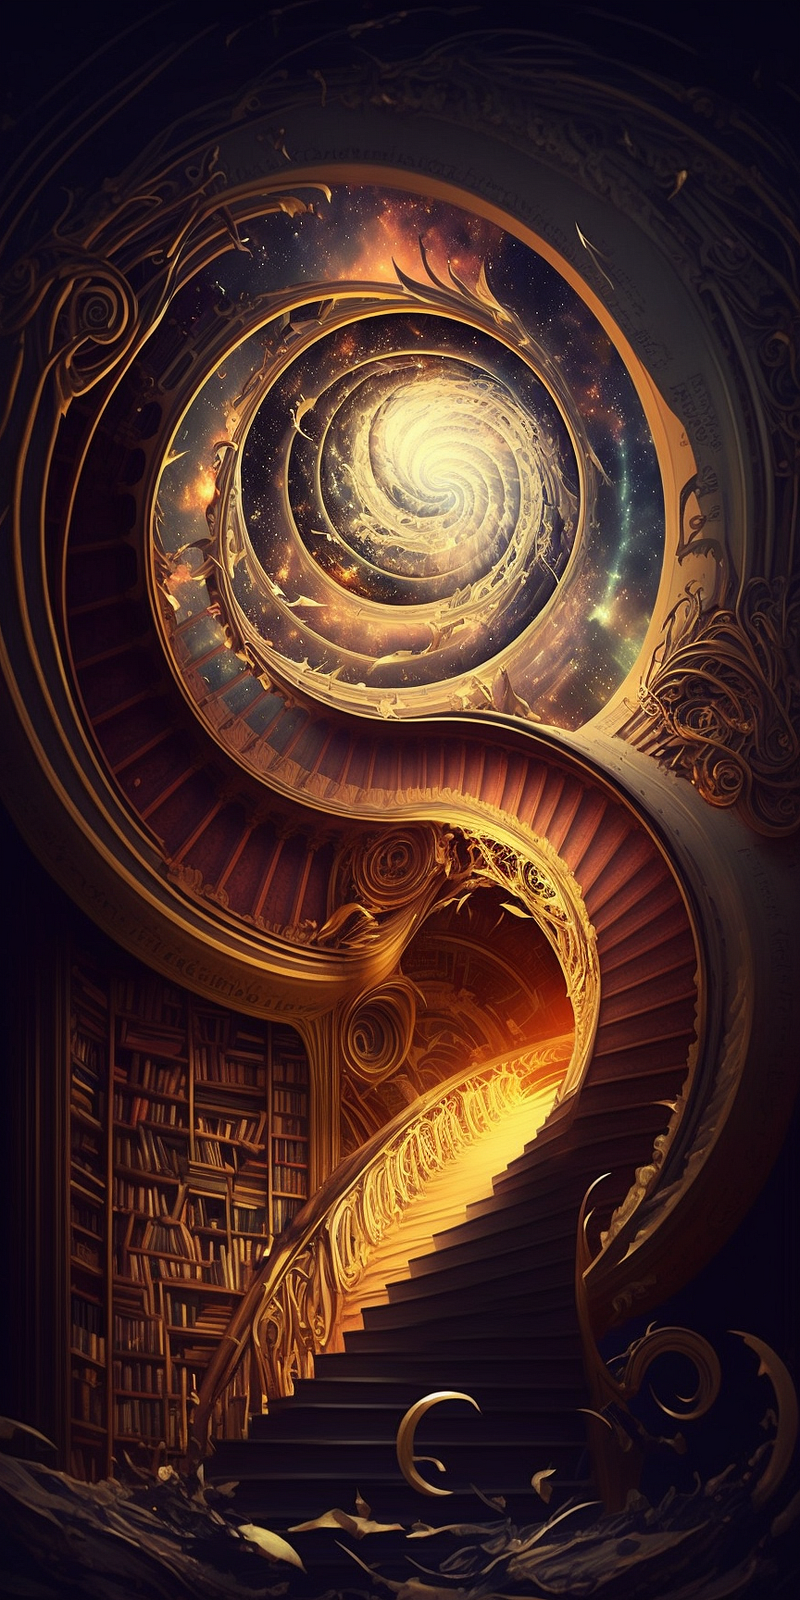